In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Mall_Customers.csv")
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: >

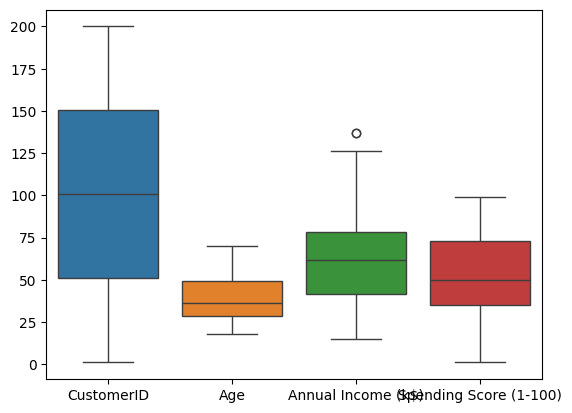

In [ ]:
sns.boxplot(df)

In [ ]:
num_col=df.select_dtypes(include='number').columns
cat_col=df.select_dtypes(exclude='number').columns

In [ ]:
col=df.columns
for i in col:
  print(i,":",df[i].nunique())

CustomerID : 200
Gender : 2
Age : 51
Annual Income (k$) : 64
Spending Score (1-100) : 84


In [ ]:
df=df.dropna( )

In [ ]:
preprocessing=ColumnTransformer(
    transformers=[
        ('scaler',StandardScaler(),num_col),
        ('onehotencoder',OneHotEncoder(handle_unknown='ignore'),cat_col),
    ]
)

In [ ]:
pipeline=Pipeline(
    steps=[
        ('preprocessing',preprocessing),
        ('model',KMeans(n_clusters=2,random_state=42))
    ]
)
res=pipeline.fit_predict(df)

In [ ]:
df['res']=res

In [ ]:
group=df.groupby('res')

In [ ]:
group.get_group(0)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),res
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
107,108,Male,54,63,46,0
108,109,Male,68,63,43,0
109,110,Male,66,63,48,0
110,111,Male,65,63,52,0


In [ ]:
group.get_group(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),res
91,92,Male,18,59,41,1
95,96,Male,24,60,52,1
97,98,Female,27,60,50,1
99,100,Male,20,61,49,1
100,101,Female,23,62,41,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,1
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


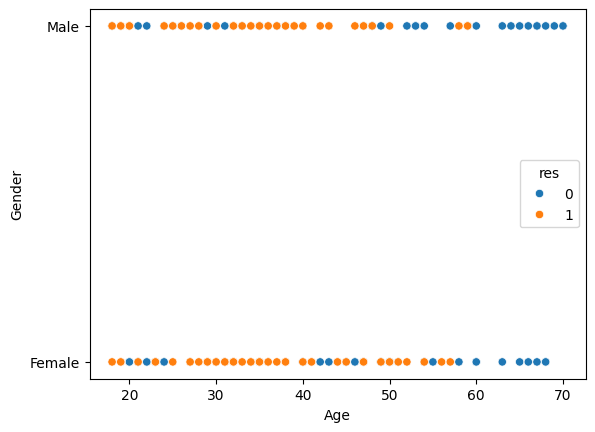

In [ ]:
sns.scatterplot(x=df['Age'],y=df['Gender'],hue=df['res'])
plt.show()

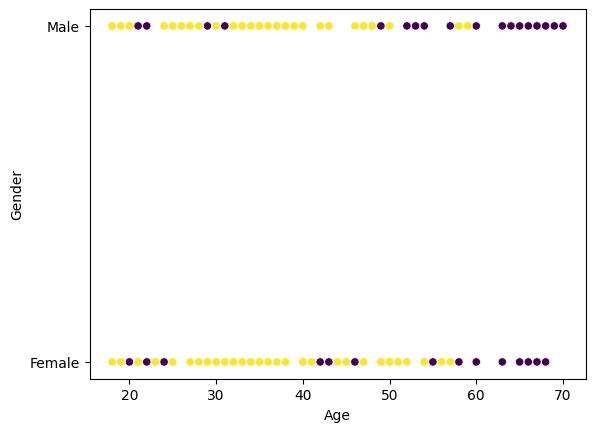

In [ ]:
sns.scatterplot(x=df['Age'],y=df['Gender'],c=df['res'])
plt.show()

In [ ]:
pipeline=Pipeline(
    steps=[
        ('preprocessing',preprocessing),
        ('model',PCA(n_components=2))
    ]
)
res1=pipeline.fit_transform(df)

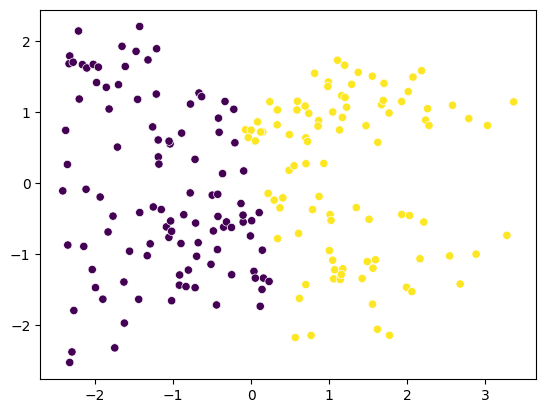

In [ ]:
sns.scatterplot(x=res1[:, 0],y=res1[:, 1],c=df['res'])
plt.show()